# 05. Feature Engineering și Aplicarea unei metode statistice

In [1]:
#Am instalat librăriile corespunzătoare 
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install statsmodels
!pip install pandas
!pip install -U scikit-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB 991.0 kB/s eta 0:00:10
    --------------------------------------- 0.2/9.3 MB 1.8 MB/s eta 0:00:05
   - -------------------------------------- 0.4/9.3 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.3 MB 3.9 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.3 MB 4.3 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.3 MB 4.7 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.3 MB 4.8 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.3 MB 5.0 MB/s eta 0:00:02
   --------- ------------------------------ 2.1/9.3 MB 5.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.5/9.3 MB 5.5 MB/s eta 0:00:02
   ------------ --------------------------- 2.8/9.3 MB 5.8 MB/s eta 0:00:02
   ------------- -------------------------- 3.2/9.3 MB 5.7 MB/s eta 0:00:02
   --------------

In [63]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis, probplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import ProbPlot

In [64]:
# Citim datele standardizate
df = pd.read_csv("date_scalate.csv")
df.head(5)

,generalState,roofCondition,joineryCondition,MEDIA,LHDI2018,hconectint18,POPD2018
0,-1.131311,-1.120421,-0.947497,1.281572,0.604292,0.652802,0.398067
1,-1.131311,-1.120421,-0.947497,1.180072,0.604292,0.652802,0.398067
2,-1.131311,-1.120421,-0.947497,1.027821,0.604292,0.652802,0.398067
3,-1.131311,-1.120421,-0.947497,0.802265,0.604292,0.652802,0.398067
4,-1.131311,-1.120421,-0.947497,1.337961,0.604292,0.652802,0.398067


In [65]:
# Corelatie 
correlation_matrix = df.corr()
correlation_matrix

,generalState,roofCondition,joineryCondition,MEDIA,LHDI2018,hconectint18,POPD2018
generalState,1.000000,0.734725,0.692217,0.071474,0.136496,0.151035,0.079599
roofCondition,0.734725,1.000000,0.672430,0.044980,0.158740,0.171399,0.075496
joineryCondition,0.692217,0.672430,1.000000,-0.007120,0.108139,0.124371,-0.024241
MEDIA,0.071474,0.044980,-0.007120,1.000000,0.345486,0.347139,0.377994
LHDI2018,0.136496,0.158740,0.108139,0.345486,1.000000,0.951347,0.658391
hconectint18,0.151035,0.171399,0.124371,0.347139,0.951347,1.000000,0.616027
POPD2018,0.079599,0.075496,-0.024241,0.377994,0.658391,0.616027,1.000000


In [66]:
df.columns

Index(['generalState', 'roofCondition', 'joineryCondition', 'MEDIA',
       'LHDI2018', 'hconectint18', 'POPD2018'],
      dtype='object')

In [67]:
# Analiza de regresie 1

# Definirea variabilelor independente și a variabilei dependente
independent_vars = ['generalState', 'roofCondition', 'joineryCondition', 'LHDI2018', 'hconectint18']
dependent_var = 'MEDIA'

# Adăugarea termenului de constantă pentru regresie
df['const'] = 1

# Definirea modelului de regresie liniară
model = sm.OLS(df[dependent_var], df[independent_vars + ['const']])

# Potrivirea modelului
results = model.fit()

# Afișarea rezumatului regresiei
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  MEDIA   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     103.2
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          1.12e-101
Time:                        19:46:03   Log-Likelihood:                -4620.6
No. Observations:                3426   AIC:                             9253.
Df Residuals:                    3420   BIC:                             9290.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
generalState         0.1147      0.026  

## Verificarea Asumptiilor

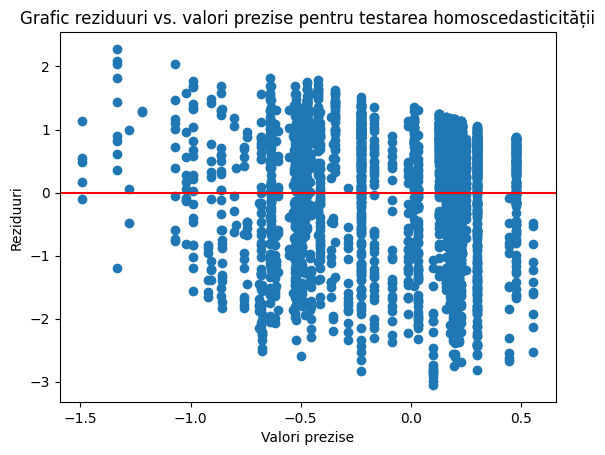

In [68]:
# Heteroscedasticitate
residuals = results.resid
predicted_values = results.fittedvalues

# Plot reziduuri vs. valori prezise
plt.scatter(predicted_values, residuals)
plt.xlabel('Valori prezise')
plt.ylabel('Reziduuri')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Grafic reziduuri vs. valori prezise pentru testarea homoscedasticității')
plt.show()

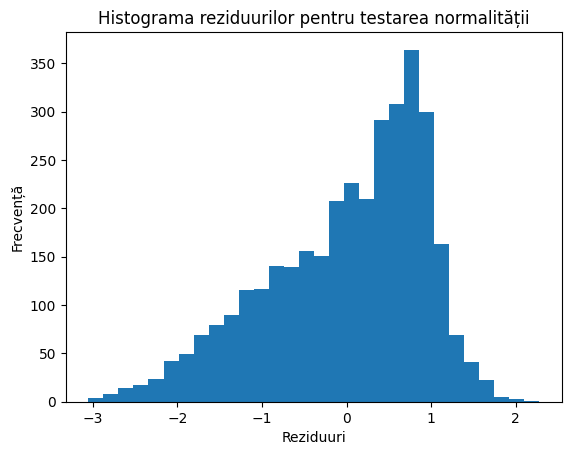

In [69]:
# Testarea normalității reziduurilor

# Histograma reziduurilor pentru a vizualiza distribuția acestora
plt.hist(results.resid, bins='auto')
plt.xlabel('Reziduuri')
plt.ylabel('Frecvență')
plt.title('Histograma reziduurilor pentru testarea normalității')
plt.show()

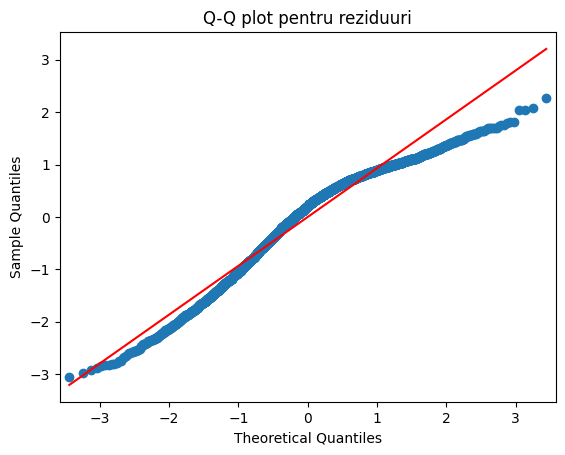

In [72]:
# Q-Q plot pentru reziduuri

# Q-Q plot pentru a compara distribuția reziduurilor cu o distribuție normală
qq = ProbPlot(results.resid)
qq.qqplot(line='s')  # 's' reprezintă linia de identitate
plt.title('Q-Q plot pentru reziduuri')
plt.show()

In [73]:
# Testul Shapiro-Wilk pentru normalitatea reziduurilor
stat, p = shapiro(results.resid)
print(f"Statistică test: {stat}, p-value: {p}")
if p > 0.05:
    print("Reziduurile urmează o distribuție normală.")
else:
    print("Reziduurile NU urmează o distribuție normală.")

Statistică test: 0.952725350856781, p-value: 6.303948157555868e-32
Reziduurile NU urmează o distribuție normală.
